In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
os.getcwd()

'C:\\Users\\kisho\\OneDrive\\Desktop\\mydata\\MT_3rd sem\\Dissertation phase one\\dissertation phase 1\\kvasir-dataset-v2'

In [3]:
import matplotlib.image as npimg

In [6]:
#test for loading image
test1= npimg.imread("C:\\Users\\kisho\\OneDrive\\Desktop\\mydata\\MT_3rd sem\\Dissertation phase one\\dissertation phase 1\\kvasir-dataset-v2\\kvasir-dataset-v2\\esophagitis\\0e0fae29-2b15-4dc2-aa4f-ed8b9e045c3f.jpg")

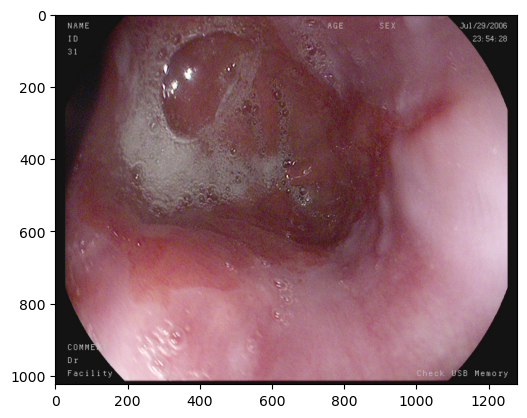

In [7]:
imgplot=plt.imshow(test1) #image show
plt.show()

In [5]:
#test for loading image

#C:\\Users\\kisho\\OneDrive\\Desktop\\mydata\\MT_3rd sem\\Dissertation phase one\\cancer detection\\kvasir-dataset-v2\\kvasir-dataset-v2\\dyed-lifted-polyps\\00cf9508-6ad1-4db9-840a-519c1d515c30.jpg")
test1= npimg.imread("C:\\Users\\kisho\\OneDrive\\Desktop\\mydata\\MT_3rd sem\\Dissertation phase one\\cancer detection\\kvasir-dataset-v2\\kvasir-dataset-v2\\dyed-lifted-polyps\\00cf9508-6ad1-4db9-840a-519c1d515c30.jpg")

In [8]:
count = 0 
dirs = os.listdir('kvasir-dataset-v2/')
for dir in dirs:
    files = list(os.listdir('kvasir-dataset-v2/'+dir))
    print( dir +' Folder has '+ str(len(files)) + '       '    'images ')
    count = count + len(files)
print( 'kvasir-dataset-v2 Folder has '+ str(count) + ' '   'images')

dyed-lifted-polyps Folder has 1000       images 
dyed-resection-margins Folder has 1000       images 
esophagitis Folder has 1000       images 
normal-cecum Folder has 1000       images 
normal-pylorus Folder has 1000       images 
normal-z-line Folder has 1000       images 
polyps Folder has 1000       images 
ulcerative-colitis Folder has 1000       images 
kvasir-dataset-v2 Folder has 8000 images


In [7]:
#Load Images into Arrays as Dataset

In [9]:
base_dir = 'kvasir-dataset-v2/'
img_size = 180
batch = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Found 8000 files belonging to 8 classes.
Using 1600 files for validation.


In [11]:
classes = train_ds.class_names
classes

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

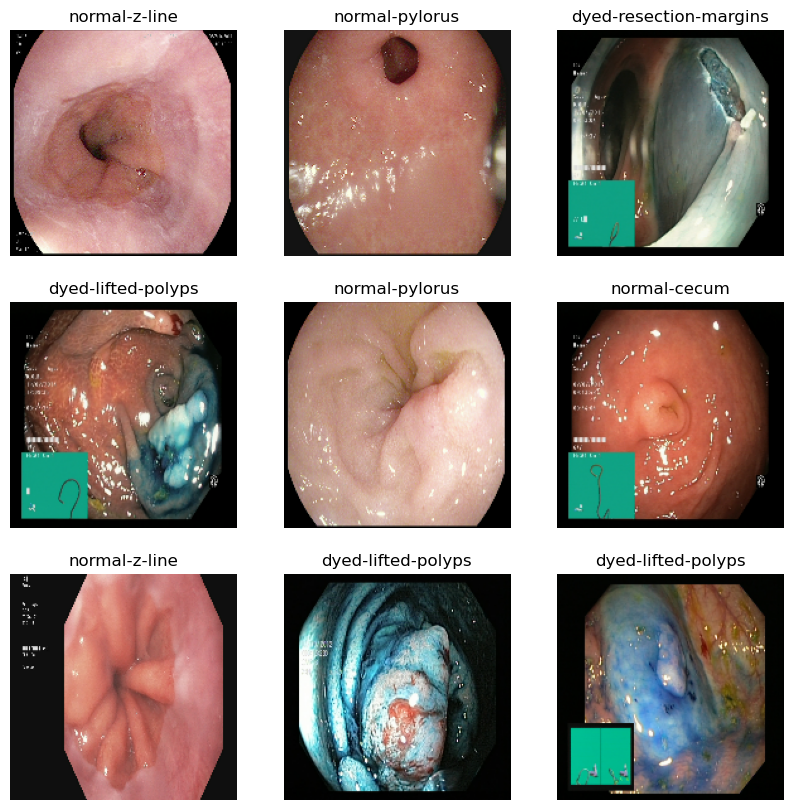

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#data_augmentation = Sequential([
    #layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    #layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1)
#])

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [15]:
#MOdel Creation

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [26]:
model = Sequential([
   
    
    Conv2D(16, (3,3), input_shape=(180,180,3),padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(8, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,672 (15.22 MB)

 Trainable params: 3,989,672 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer=Adam(learning_rate=0.001),  # Optimizer (e.g., Adam)
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # Metrics to monitor



In [30]:
history = model.fit(train_ds, epochs=2, validation_data=val_ds)

Epoch 1/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.4301 - loss: 29.1206 - val_accuracy: 0.6481 - val_loss: 0.7778
Epoch 2/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.6582 - loss: 0.7465 - val_accuracy: 0.6494 - val_loss: 0.7635


In [32]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.9288 - loss: 0.1913 - val_accuracy: 0.6775 - val_loss: 1.3282
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - accuracy: 0.9537 - loss: 0.1420 - val_accuracy: 0.6831 - val_loss: 1.2090
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 44s 219ms/step - accuracy: 0.9722 - loss: 0.0799 - val_accuracy: 0.6781 - val_loss: 1.4025
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9647 - loss: 0.1054 - val_accuracy: 0.6819 - val_loss: 1.4045
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.9767 - loss: 0.0620 - val_accuracy: 0.6819 - val_loss: 1.5288
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.9695 - loss: 0.0863 - val_accuracy: 0.6781 - val_loss: 1.5044
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.9693 - loss: 0.0830 - val_accuracy: 0.6225 - val_loss: 1.9047
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.9624 - loss: 0

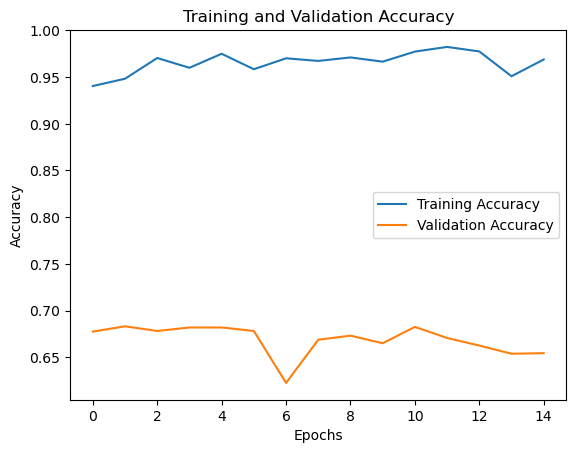

In [33]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

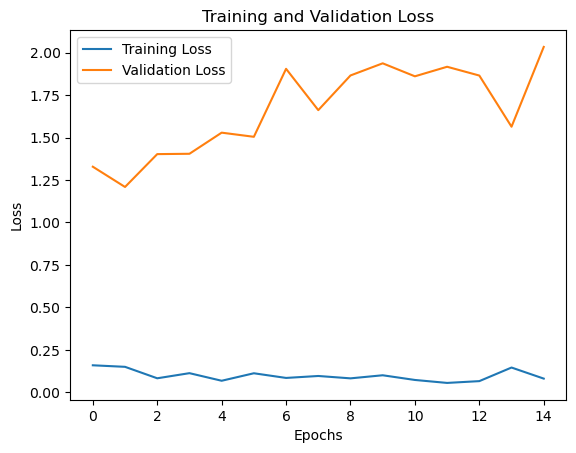

In [34]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [35]:
# Step 6: Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy:.2f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6575 - loss: 1.8517
Validation Accuracy: 0.65
